In [4]:
library("factoextra")
options(repr.plot.width=12, repr.plot.height=13)

Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


In [5]:
path="C:/Users/Jordi/New_Jupyter/"
setwd(path)
mydata = read.csv("threads_ideal_data_partial_sp_cl+listR.csv", sep=";")
unique(mydata[,"comp_opt"])

[1] O2
Levels: O2

In [6]:
colnames(mydata)

[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "time_x"       "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN" 
[16] "PAPI_BR_MSP"  "time_y"       "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM" 
[21] "time_x.1"     "PAPI_SP_OPS"  "PAPI_LD_INS"  "PAPI_L2_STM"  "time_y.1"    
[26] "PAPI_TLB_DM"  "PAPI_L2_DCH"  "time"         "time_log"     "P_index"     
[31] "ideal"        "affinity"     "T_list"       "P_list"

In [7]:
library(stringr)
colnames(mydata)<-gsub(x = names(mydata), pattern = "\\.", replacement = "_" )

In [8]:
#colnames(mydata)

In [9]:
mydata = mydata[mydata$affinity == 'spread',]
mydata = mydata[mydata$threads == 6,]
unique(mydata$threads)
mydata_no_time <- subset(mydata, select = -c(P_list))
mydata_no_time <- subset(mydata_no_time, select = -c(T_list))
mydata_no_time <- subset(mydata_no_time, select = -c(ideal))
mydata_no_time <- subset(mydata_no_time, select = -c(P_index))
mydata_no_time <- subset(mydata_no_time, select = -c(time_log))
mydata_no_time <- subset(mydata_no_time, select = -c(time))
mydata_no_time <- subset(mydata_no_time, select = -c(time_y_1))
mydata_no_time <- subset(mydata_no_time, select = -c(time_x_1))
mydata_no_time <- subset(mydata_no_time, select = -c(time_x))
mydata_no_time <- subset(mydata_no_time, select = -c(time_y))
mydata_no_time <- subset(mydata_no_time, select = -c(affinity))




mydata_no_time <- subset(mydata_no_time, select = -c(PAPI_SP_OPS))



[1] 6

In [10]:
colnames(mydata_no_time)

[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[16] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[21] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [11]:
#mydata = mydata[mydata$comp_opt != 'NF',]
#mydata = mydata[mydata$comp_opt != 'O1',]
#mydata = mydata[mydata$label != '2D4PStencil_E',]
#mydata = mydata[mydata$label != 'Reduction_E',]
#mydata = mydata[mydata$label != '2PStencil_E',]

#head(mydata)
#unique(mydata[,"comp_opt"])

In [12]:
#head(mydata)

In [13]:
dfu <- unique(mydata_no_time$size_vector)
#dfu[order(dfu)]

comprss <- function(tx) { 
      div <- findInterval(as.numeric(gsub("\\,", "", tx)), 
                          c(1, 1e3, 1e6, 1e9, 1e12) )
      paste(round( as.numeric(gsub("\\,","",tx))/10^(3*(div-1)), 2), 
           c("","K","M","B","T")[div] )}
comprss(dfu[order(dfu)])



[1] "1 K"   "2 K"   "3 K"   "4 K"   "5 K"   "6 K"   "7 K"   "8 K"   "9 K"  
[10] "10 K"  "20 K"  "30 K"  "40 K"  "50 K"  "60 K"  "70 K"  "80 K"  "90 K" 
[19] "100 K" "200 K" "300 K" "400 K" "500 K" "600 K" "700 K" "800 K" "900 K"
[28] "1 M"   "2 M"   "3 M"   "5 M"   "7 M"   "9 M"   "20 M"  "40 M"  "60 M" 
[37] "80 M"  "100 M" "120 M" "140 M" "160 M" "180 M" "200 M"

In [14]:
#print(new_mydata[,c("PAPI_VEC_SP","PAPI_VEC_DP")])
#print(mydata[,c("PAPI_VEC_SP","PAPI_SP_OPS")])

In [15]:
#div = mydata$PAPI_SP_OPS/mydata$PAPI_VEC_SP
#div <- na.omit(div)
#subs = mydata$PAPI_BR_INS-(mydata$PAPI_BR_CN + mydata$PAPI_BR_UCN)

In [16]:
#mean(div)
#quantile(div,0.25)
#quantile(div,0.5)
#quantile(div,0.75)
#boxplot(div)

In [17]:
#print(mydata[,c("PAPI_BR_INS","PAPI_BR_CN","PAPI_BR_UCN")])#subs = mydata$PAPI_BR_INS-(mydata$PAPI_BR_CN/mydata$PAPI_BR_UCN)
#print(subs)
#perc = subs/mydata$PAPI_BR_INS

#head(percent(perc[order(perc,decreasing = TRUE)]))

In [18]:
#all(new_mydata$PAPI_VEC_SP == new_mydata$PAPI_VEC_DP)
all(mydata_no_time$PAPI_DP_SP == mydata_no_time$PAPI_SP_OPS)

[1] TRUE

In [19]:
colnames(mydata_no_time)

[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[16] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[21] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [20]:
colnames(mydata_no_time[6:ncol(mydata_no_time)])

[1] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
 [6] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[11] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[16] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [21]:
new_mydata = mydata_no_time[,6:ncol(mydata_no_time)]
dim(new_mydata)


[1] 64500    17

In [22]:
new_mydata

,PAPI_L1_DCM,PAPI_L3_TCM,PAPI_TOT_INS,PAPI_REF_CYC,PAPI_L2_LDM,PAPI_SR_INS,PAPI_BR_UCN,PAPI_BR_CN,PAPI_BR_TKN,PAPI_BR_MSP,PAPI_FP_OPS,PAPI_L1_LDM,PAPI_L1_STM,PAPI_LD_INS,PAPI_L2_STM,PAPI_TLB_DM,PAPI_L2_DCH
792001,24617,9499,1478623,2662416,8432,109538,8239,337162,229506,1730,129,12249,8574,244897,7467,529,4917
792002,23227,102,2274481,3496662,3924,108220,8012,604108,363338,1363,75,12134,9311,379693,3998,75,12686
792003,23279,109,2293204,3520278,2749,108220,8017,634602,378424,1417,75,12272,9685,376522,1743,70,17507
792004,23230,115,2273370,3474990,2299,108226,8021,598883,360332,1353,69,12252,9700,371659,1411,59,18315
792005,23202,125,2293132,3513654,2621,108220,8021,586851,354298,1325,81,12524,9878,373736,1526,57,17779
792006,23179,123,2279235,3492144,2620,108220,8036,595037,358486,1377,81,12365,9762,382602,1436,62,17839
792007,23208,114,2378409,3660786,2485,108225,8021,594089,358085,1359,69,12352,9759,370997,1295,59,18173
792008,23132,106,2300016,3518082,2288,108220,8009,589023,355459,1335,81,12393,9817,378620,1555,56,17614
792009,23160,125,2290450,3511962,2569,108220,8025,594675,358389,1360,75,12321,9770,368691,1512,58,18280
792010,23158,111,2289420,3501702,2619,108220,8034,595500,358801,1330,81,12437,9757,381270,1414,57,17870


In [23]:
colnames(mydata_no_time)
log.ir <-scale(new_mydata, center = TRUE, scale = TRUE)
res.label <- mydata_no_time[,4]
res.pca <- prcomp(log.ir, center = TRUE, scale. = TRUE)



[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[16] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[21] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [24]:
print(res.pca)

Standard deviations (1, .., p=17):
 [1] 3.382456378 1.523801528 0.953991976 0.778129296 0.763706396 0.685767920
 [7] 0.524393017 0.463327954 0.289165939 0.229676801 0.199087649 0.031027217
[13] 0.025065292 0.021141254 0.012111684 0.006725872 0.003438883

Rotation (n x k) = (17 x 17):
                   PC1         PC2          PC3         PC4          PC5
PAPI_L1_DCM  0.2755831 -0.18478639 -0.194189847  0.04819694 -0.002372899
PAPI_L3_TCM  0.2545542 -0.20274092 -0.124881326 -0.23778477 -0.244587796
PAPI_TOT_INS 0.2618060  0.28254701  0.008805725  0.13549282  0.016017292
PAPI_REF_CYC 0.2702261 -0.14241170 -0.168777536 -0.26051610 -0.203087921
PAPI_L2_LDM  0.2408740 -0.25610906 -0.066535216  0.26118330  0.011497291
PAPI_SR_INS  0.2716668  0.17538743  0.105193609  0.16597464  0.048367517
PAPI_BR_UCN  0.1944126  0.03215587  0.122350722 -0.56772200  0.758187287
PAPI_BR_CN   0.2703230  0.18611765  0.150810547  0.16454658  0.087185659
PAPI_BR_TKN  0.2702626  0.18610920  0.151042940  0.1661889

In [25]:
names(res.pca)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [26]:
print(res.pca$sdev)

 [1] 3.382456378 1.523801528 0.953991976 0.778129296 0.763706396 0.685767920
 [7] 0.524393017 0.463327954 0.289165939 0.229676801 0.199087649 0.031027217
[13] 0.025065292 0.021141254 0.012111684 0.006725872 0.003438883


In [27]:
head(unclass(res.pca$rotation)[])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
PAPI_L1_DCM,0.2755831,-0.1847864,-0.194189847,0.04819694,-0.002372899,0.07545716,-0.12549457,-0.06226775,0.1761395116,-0.024404534,0.35881380,0.61600092,0.47746700,-0.036980876,0.19529820,-0.130856847,-0.010831306
PAPI_L3_TCM,0.2545542,-0.2027409,-0.124881326,-0.23778477,-0.244587796,0.02129976,0.51379262,-0.03098798,0.0006400175,0.100869765,-0.39751678,0.04292408,-0.09294964,0.279360829,0.45036495,-0.192848265,-0.001740018
PAPI_TOT_INS,0.2618060,0.2825470,0.008805725,0.13549282,0.016017292,-0.04462470,0.06156318,0.14482041,-0.3330899760,-0.142852859,0.21355155,0.46516021,-0.60631426,0.201784823,-0.05312805,0.039146873,0.012438715
PAPI_REF_CYC,0.2702261,-0.1424117,-0.168777536,-0.26051610,-0.203087921,-0.11848025,0.24581484,-0.08206504,0.0451239549,0.033990504,-0.18405335,0.19153573,0.01472568,-0.326792903,-0.65078265,0.289120309,0.005313829
PAPI_L2_LDM,0.2408740,-0.2561091,-0.066535216,0.26118330,0.011497291,0.53633470,-0.08571906,0.04815145,-0.0655402257,-0.007991737,-0.07549537,-0.15173902,-0.19181859,-0.229668016,-0.24161459,-0.570130248,-0.015467201
PAPI_SR_INS,0.2716668,0.1753874,0.105193609,0.16597464,0.048367517,-0.06035569,0.03572883,-0.28467260,-0.0442537515,-0.801872073,-0.25088701,-0.11103661,0.21802350,0.003477474,0.02600485,0.007942563,-0.003093250


In [28]:
# Eigenvalues
eig <- (res.pca$sdev)^2
print(eig)

 [1] 1.144101e+01 2.321971e+00 9.101007e-01 6.054852e-01 5.832475e-01
 [6] 4.702776e-01 2.749880e-01 2.146728e-01 8.361694e-02 5.275143e-02
[11] 3.963589e-02 9.626882e-04 6.282689e-04 4.469526e-04 1.466929e-04
[16] 4.523735e-05 1.182591e-05


In [29]:
# Variances in percentage
variance <- eig*100/sum(eig)
print(variance)

 [1] 6.730007e+01 1.365865e+01 5.353533e+00 3.561678e+00 3.430867e+00
 [6] 2.766339e+00 1.617577e+00 1.262781e+00 4.918644e-01 3.103025e-01
[11] 2.331523e-01 5.662872e-03 3.695699e-03 2.629133e-03 8.628993e-04
[16] 2.661021e-04 6.956420e-05


In [30]:
# Cumulative variances
cumvar <- cumsum(variance)
print(cumvar)

 [1]  67.30007  80.95872  86.31225  89.87393  93.30480  96.07114  97.68871
 [8]  98.95149  99.44336  99.75366  99.98681  99.99248  99.99617  99.99880
[15]  99.99966  99.99993 100.00000


In [31]:
eig.decathlon2.active <- data.frame(eig = eig, variance = variance,cumvariance = cumvar)
print(eig.decathlon2.active)

            eig     variance cumvariance
1  1.144101e+01 6.730007e+01    67.30007
2  2.321971e+00 1.365865e+01    80.95872
3  9.101007e-01 5.353533e+00    86.31225
4  6.054852e-01 3.561678e+00    89.87393
5  5.832475e-01 3.430867e+00    93.30480
6  4.702776e-01 2.766339e+00    96.07114
7  2.749880e-01 1.617577e+00    97.68871
8  2.146728e-01 1.262781e+00    98.95149
9  8.361694e-02 4.918644e-01    99.44336
10 5.275143e-02 3.103025e-01    99.75366
11 3.963589e-02 2.331523e-01    99.98681
12 9.626882e-04 5.662872e-03    99.99248
13 6.282689e-04 3.695699e-03    99.99617
14 4.469526e-04 2.629133e-03    99.99880
15 1.466929e-04 8.628993e-04    99.99966
16 4.523735e-05 2.661021e-04    99.99993
17 1.182591e-05 6.956420e-05   100.00000


In [32]:
summary(res.pca)

Importance of components:
                         PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.382 1.5238 0.95399 0.77813 0.76371 0.68577 0.52439
Proportion of Variance 0.673 0.1366 0.05354 0.03562 0.03431 0.02766 0.01618
Cumulative Proportion  0.673 0.8096 0.86312 0.89874 0.93305 0.96071 0.97689
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     0.46333 0.28917 0.2297 0.19909 0.03103 0.02507 0.02114
Proportion of Variance 0.01263 0.00492 0.0031 0.00233 0.00006 0.00004 0.00003
Cumulative Proportion  0.98951 0.99443 0.9975 0.99987 0.99992 0.99996 0.99999
                          PC15     PC16     PC17
Standard deviation     0.01211 0.006726 0.003439
Proportion of Variance 0.00001 0.000000 0.000000
Cumulative Proportion  1.00000 1.000000 1.000000

In [33]:
library("factoextra")
eig.val <- get_eigenvalue(res.pca)
head(eig.val)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,11.4410112,67.300066,67.30007
Dim.2,2.3219711,13.658654,80.95872
Dim.3,0.9101007,5.353533,86.31225
Dim.4,0.6054852,3.561678,89.87393
Dim.5,0.5832475,3.430867,93.30480
Dim.6,0.4702776,2.766339,96.07114


In [34]:
options(repr.plot.width = 20, repr.plot.height = 10)

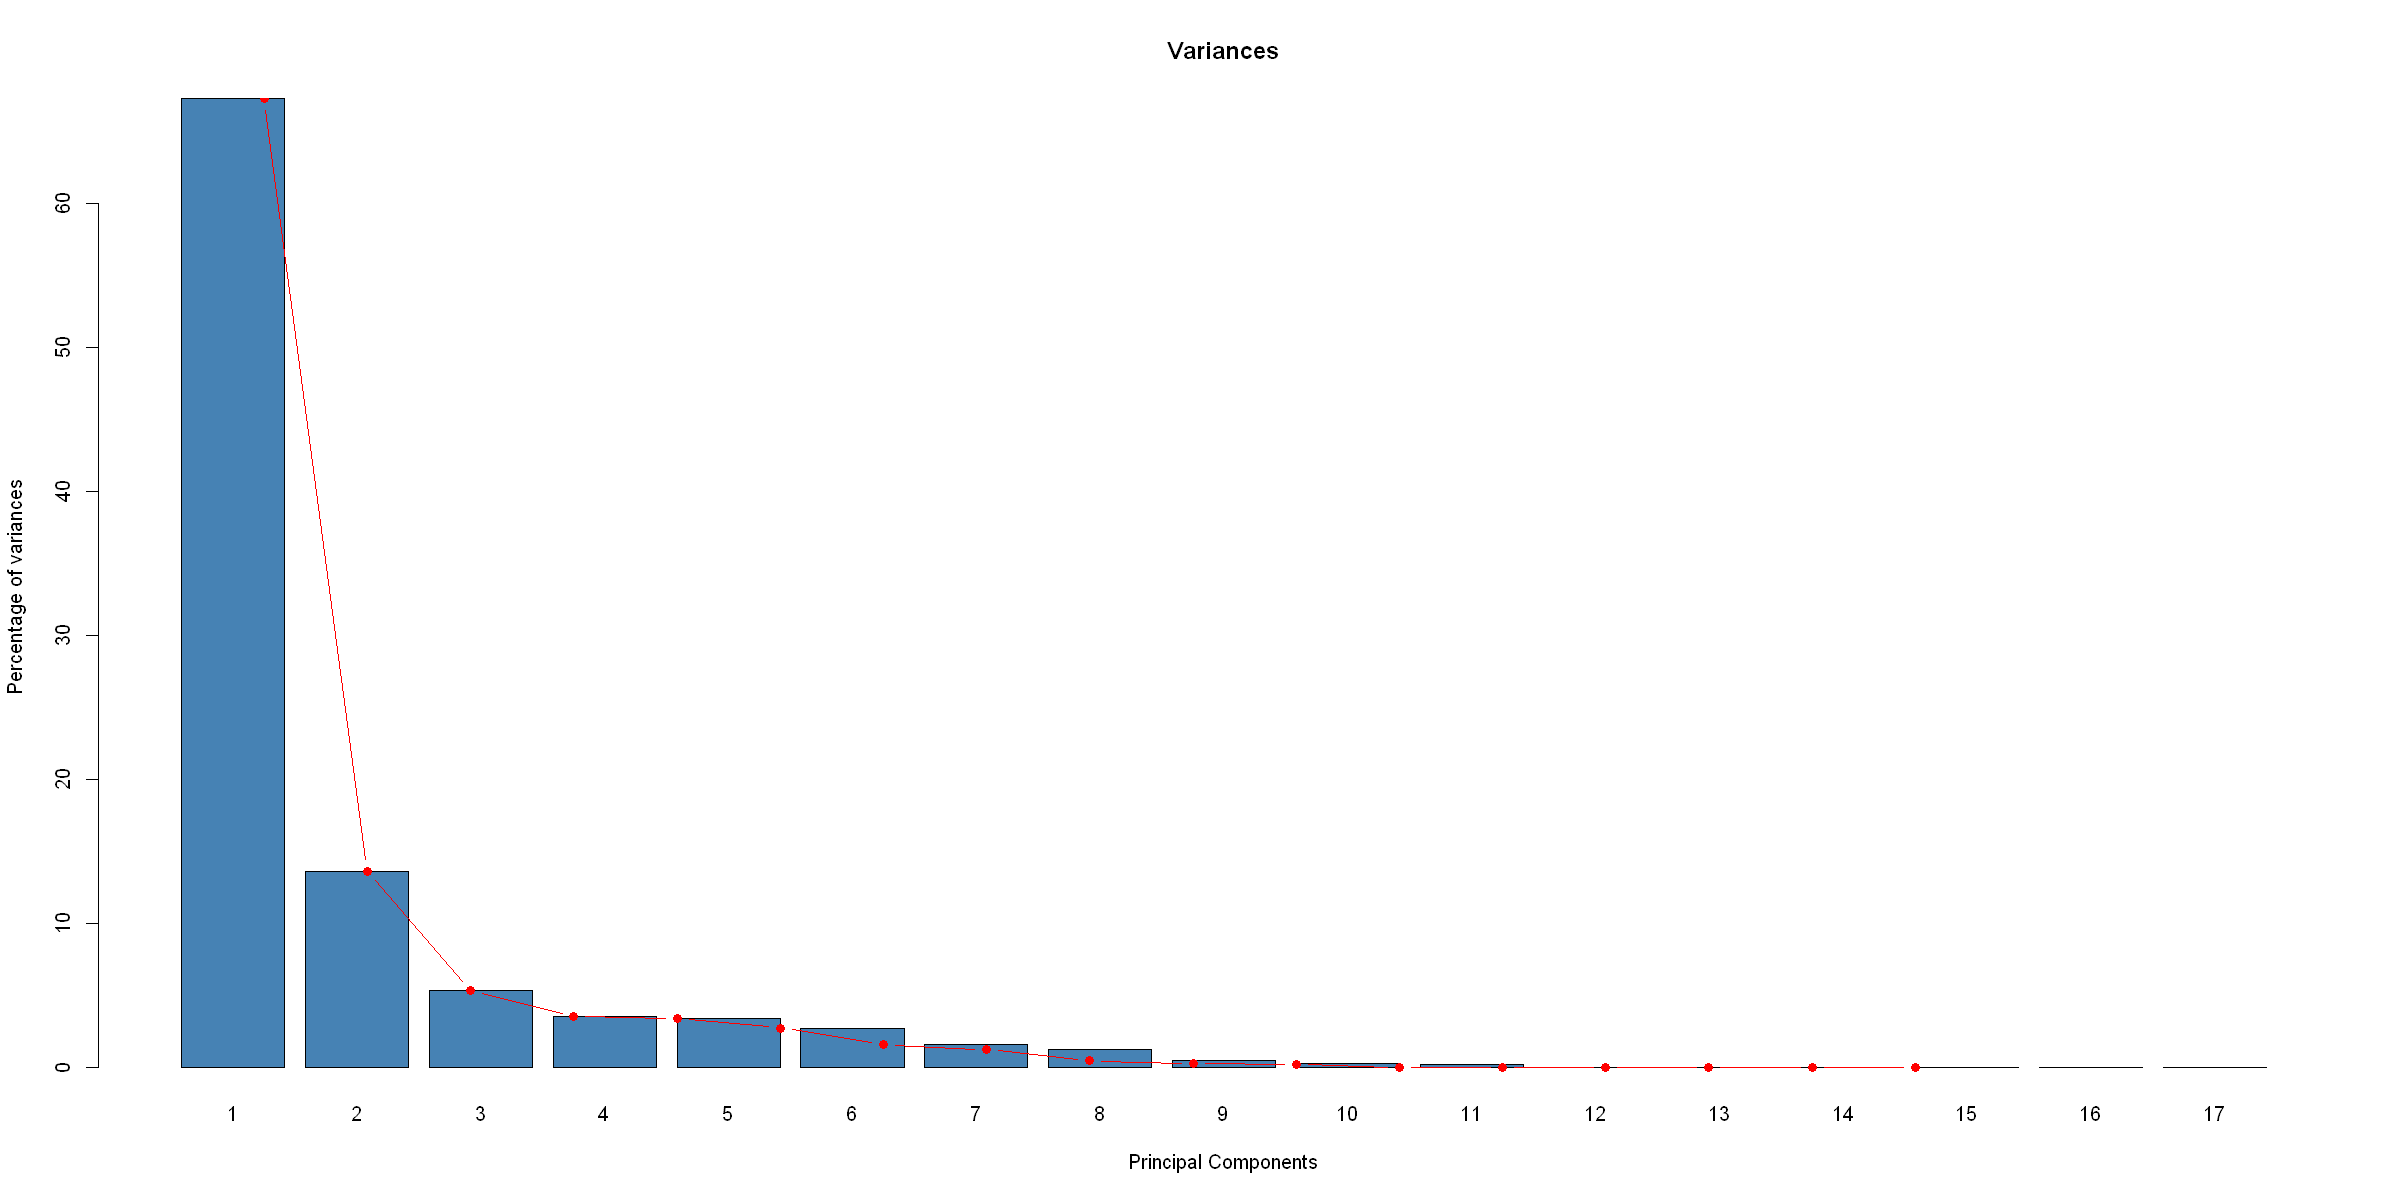

In [35]:
barplot(eig.decathlon2.active[, 2], names.arg=1:nrow(eig.decathlon2.active), 
       main = "Variances",
       xlab = "Principal Components",
       ylab = "Percentage of variances",
       col ="steelblue")
# Add connected line segments to the plot
lines(x = 1:nrow(eig.decathlon2.active), 
      eig.decathlon2.active[, 2], 
      type="b", pch=19, col = "red")

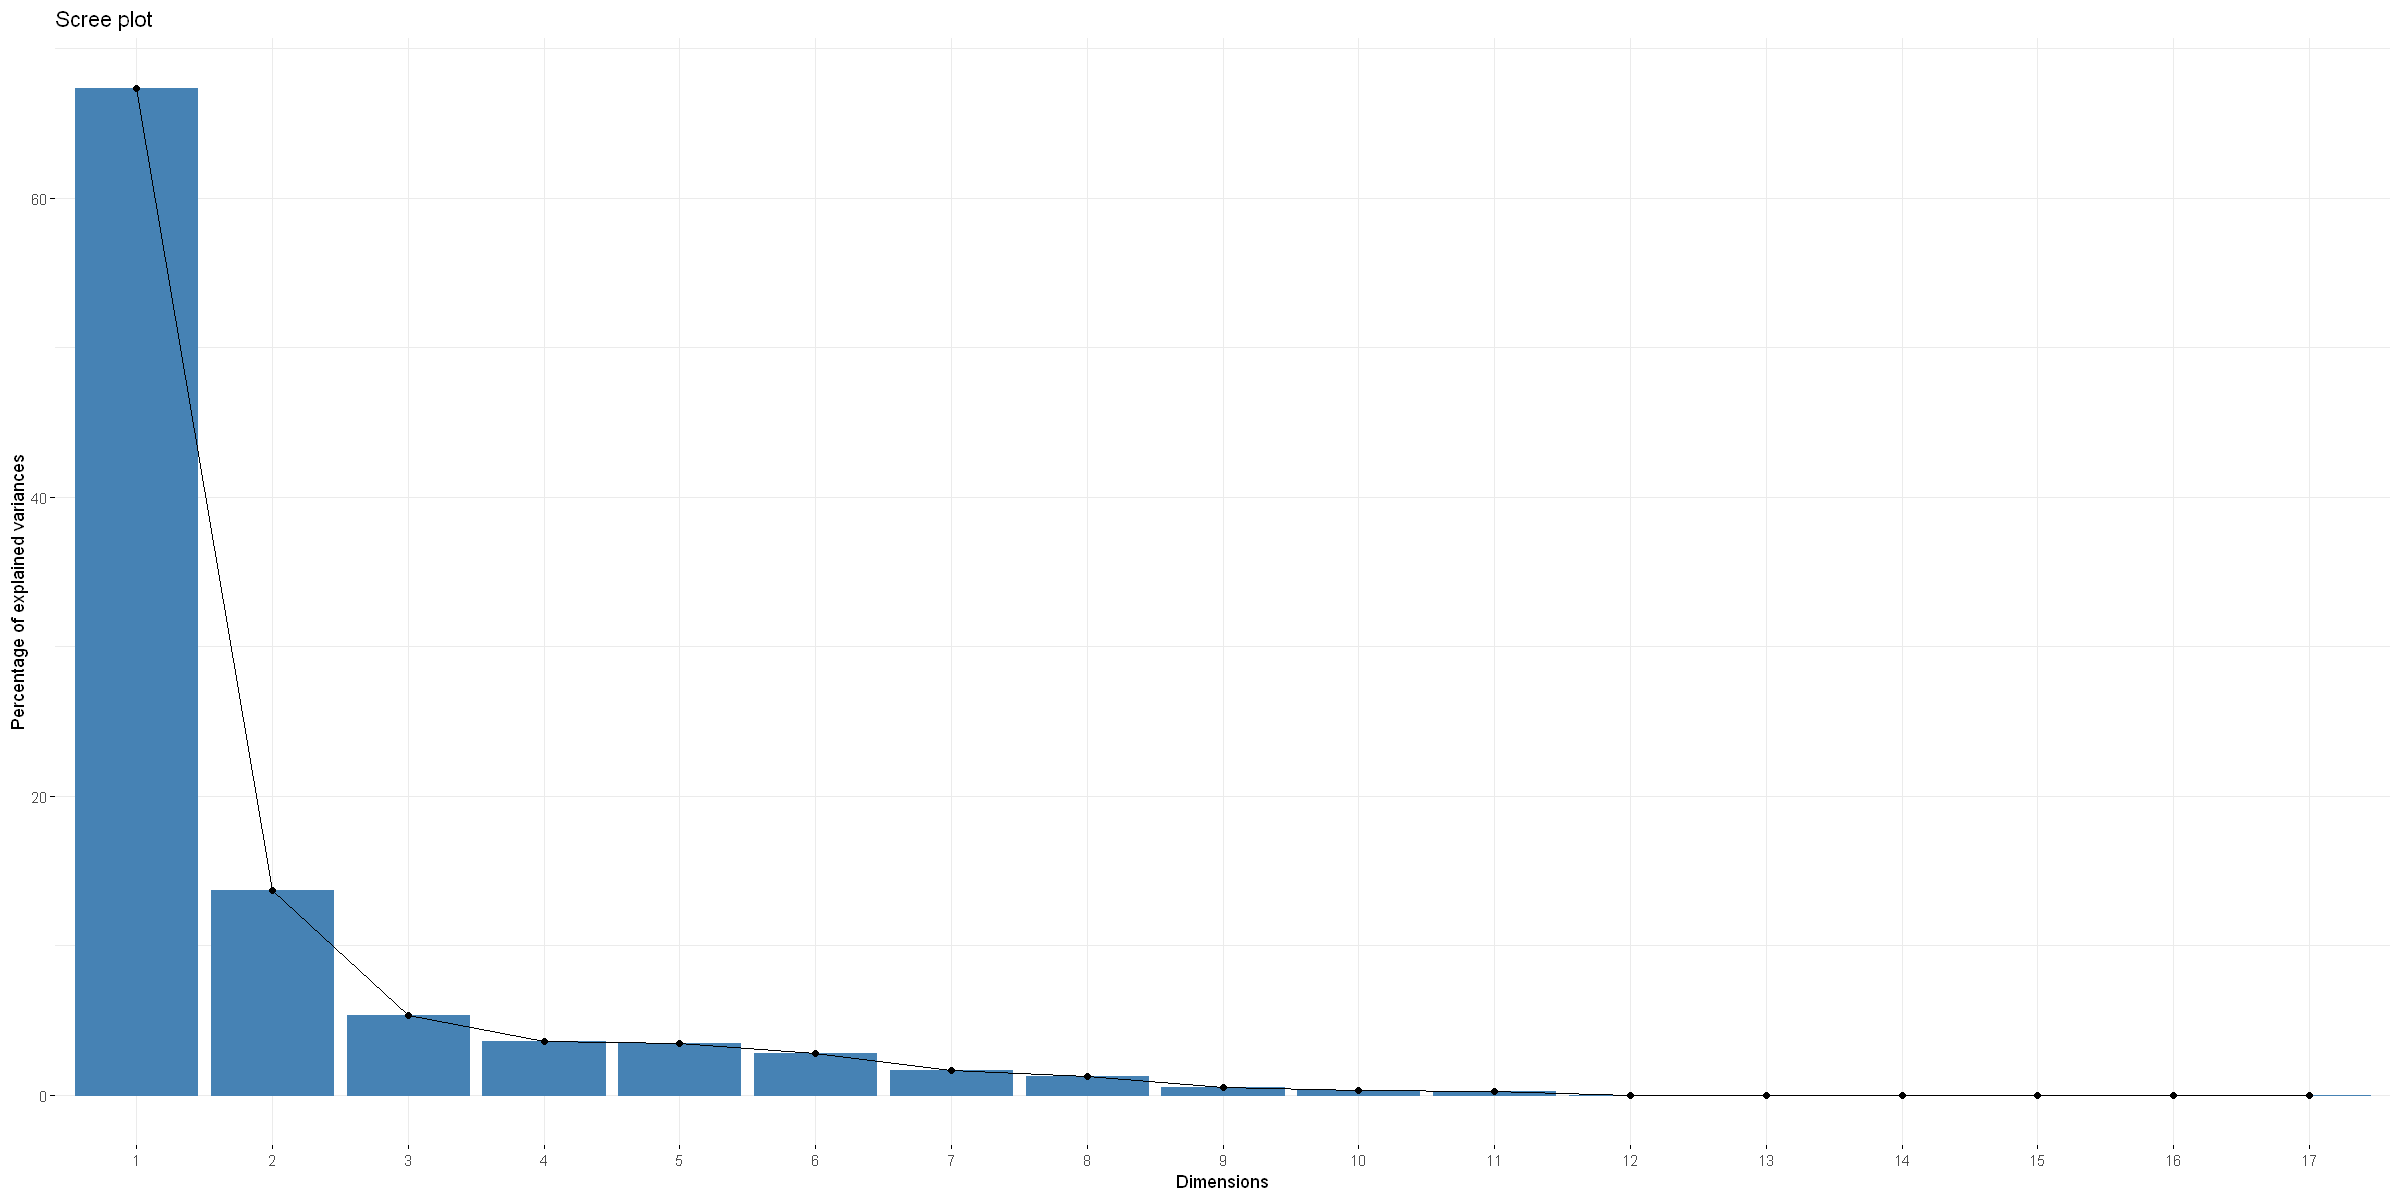

In [36]:
fviz_screeplot(res.pca, ncp=54)

In [37]:
var <- get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [38]:
var$coord


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12,Dim.13,Dim.14,Dim.15,Dim.16,Dim.17
PAPI_L1_DCM,0.9321478,-0.28157779,-0.185255556,0.03750345,-0.001812198,0.0517460988,-0.065808475,-0.02885039,5.093355e-02,-0.005605155,0.0714353961,1.911279e-02,1.196785e-02,-7.818221e-04,2.365390e-03,-8.801264e-04,-3.724759e-05
PAPI_L3_TCM,0.8610184,-0.30893693,-0.119135783,-0.18502730,-0.186793264,0.0146066904,0.269429262,-0.01435760,1.850713e-04,0.023167445,-0.0791406810,1.331815e-03,-2.329810e-03,5.906038e-03,5.454678e-03,-1.297073e-03,-5.983718e-06
PAPI_TOT_INS,0.8855475,0.43054557,0.008400591,0.10543093,0.012232508,-0.0306021854,0.032283302,0.06709935,-9.631828e-02,-0.032809988,0.0425154768,1.443263e-02,-1.519744e-02,4.265984e-03,-6.434701e-04,2.632968e-04,4.277528e-05
PAPI_REF_CYC,0.9140280,-0.21700717,-0.161012415,-0.20271521,-0.155099544,-0.0812499521,0.128903586,-0.03802302,1.304831e-02,0.007806830,-0.0366427493,5.942821e-03,3.691035e-04,-6.908812e-03,-7.882074e-03,1.944586e-03,1.827363e-05
PAPI_L2_LDM,0.8147459,-0.39025938,-0.063474062,0.20323438,0.008780555,0.3678011320,-0.044950479,0.02230991,-1.895200e-02,-0.001835517,-0.0150301963,-4.708040e-03,-4.807989e-03,-4.855470e-03,-2.926360e-03,-3.834623e-03,-5.318989e-05
PAPI_SR_INS,0.9189009,0.26725564,0.100353859,0.12914973,0.036938582,-0.0413899961,0.018735949,-0.13189677,-1.279668e-02,-0.184171412,-0.0499485059,-3.445157e-03,5.464823e-03,7.351817e-05,3.149626e-04,5.342066e-05,-1.063732e-05
PAPI_BR_UCN,0.6575920,0.04899917,0.116721607,-0.44176112,0.579032480,0.1394575420,0.020746649,0.03484235,3.904236e-04,-0.004726219,-0.0010633866,-3.133135e-05,6.821424e-05,2.666078e-05,7.309786e-06,-1.974475e-06,6.967052e-06
PAPI_BR_CN,0.9143558,0.28360636,0.143872052,0.12803851,0.066584245,-0.0543161131,0.034952368,-0.16662554,-5.287338e-02,0.084800340,0.0071381422,-2.830575e-03,2.451063e-03,-9.100910e-04,1.863412e-04,5.239457e-05,-2.440740e-03
PAPI_BR_TKN,0.9141514,0.28359348,0.144093753,0.12931652,0.064848437,-0.0550883601,0.034973648,-0.16687359,-5.298997e-02,0.084982146,0.0071942998,-2.874617e-03,3.016522e-03,-1.113425e-03,1.652709e-04,-2.260554e-04,2.419740e-03
PAPI_BR_MSP,0.9038644,-0.13774312,0.103746167,-0.26106113,-0.241872245,-0.0008697959,0.004695764,-0.07790747,5.366111e-02,-0.033881645,0.1278269632,-1.246875e-02,-4.605108e-03,1.054599e-03,4.107372e-04,-4.077344e-05,8.764049e-06


Loading required package: plyr
Loading required package: scales
Loading required package: grid


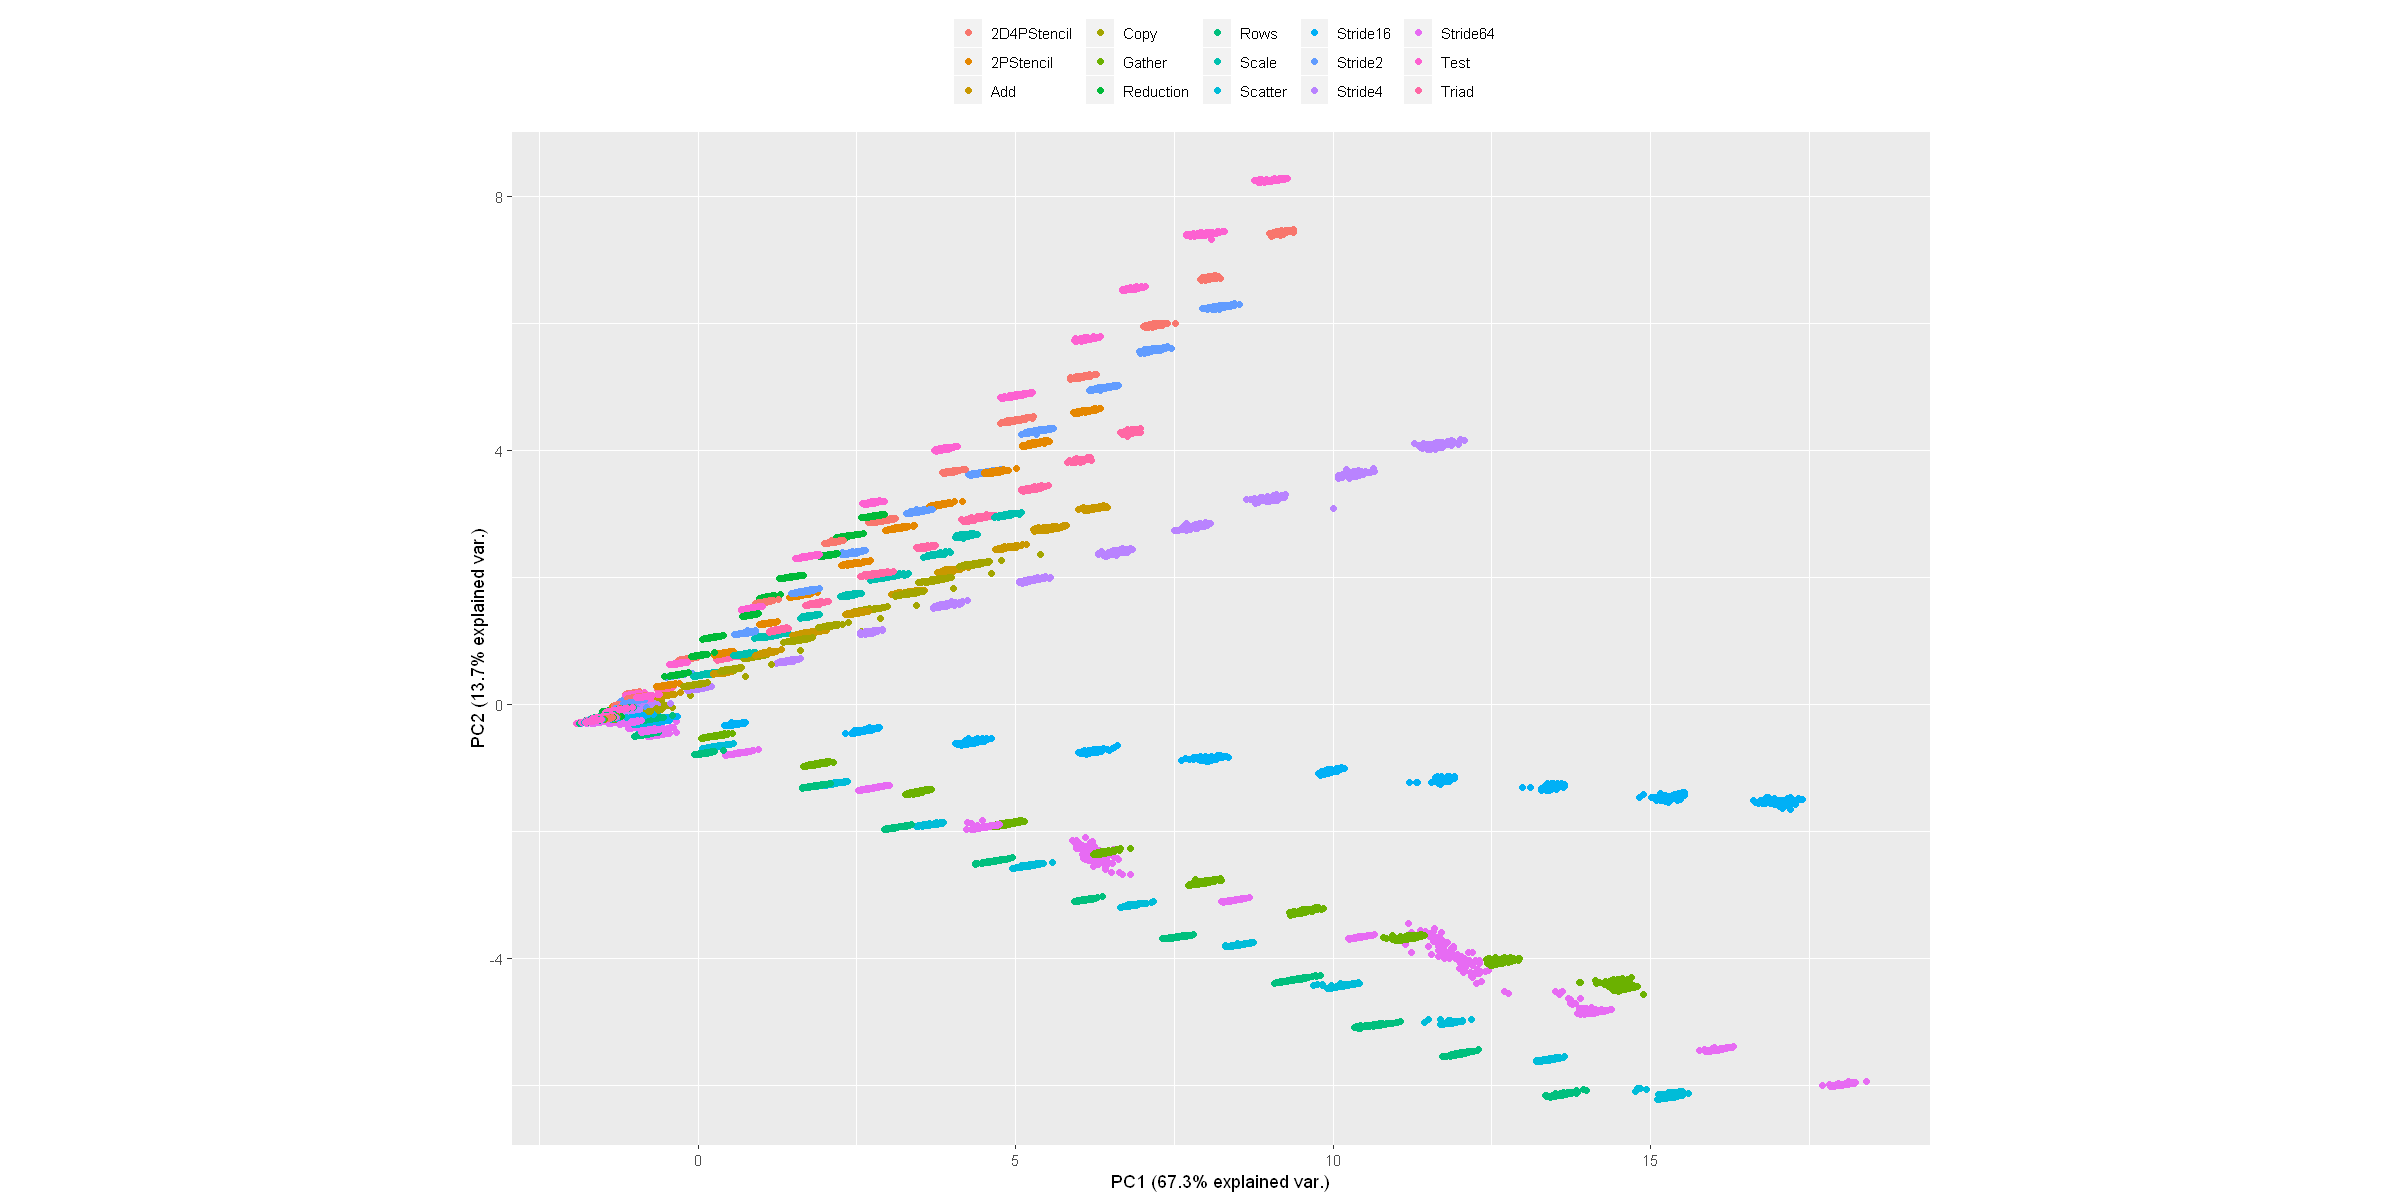

In [39]:
library(devtools)
library(ggbiplot)
g <- ggbiplot(res.pca, obs.scale = 1, var.scale = 1, groups = res.label, ellipse = FALSE, circle = TRUE, var.axes=FALSE)
#g <- ggbiplot(res.pca, obs.scale = 1, var.scale = 1, groups = {res.label, res.threads}, ellipse = FALSE, circle = TRUE, var.axes=FALSE)
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal', legend.position = 'top')
print(g)

In [40]:
# Helper function : 
# Correlation between variables and principal components
var_cor_func <- function(var.loadings, comp.sdev){
  var.loadings*comp.sdev
  }

# Variable correlation/coordinates
loadings <- res.pca$rotation
sdev <- res.pca$sdev

var.coord <- var.cor <- t(apply(loadings, 1, var_cor_func, sdev))
print(var.coord[, 1:4])

                   PC1         PC2          PC3         PC4
PAPI_L1_DCM  0.9321478 -0.28157779 -0.185255556  0.03750345
PAPI_L3_TCM  0.8610184 -0.30893693 -0.119135783 -0.18502730
PAPI_TOT_INS 0.8855475  0.43054557  0.008400591  0.10543093
PAPI_REF_CYC 0.9140280 -0.21700717 -0.161012415 -0.20271521
PAPI_L2_LDM  0.8147459 -0.39025938 -0.063474062  0.20323438
PAPI_SR_INS  0.9189009  0.26725564  0.100353859  0.12914973
PAPI_BR_UCN  0.6575920  0.04899917  0.116721607 -0.44176112
PAPI_BR_CN   0.9143558  0.28360636  0.143872052  0.12803851
PAPI_BR_TKN  0.9141514  0.28359348  0.144093753  0.12931652
PAPI_BR_MSP  0.9038644 -0.13774312  0.103746167 -0.26106113
PAPI_FP_OPS  0.6882516  0.58420775 -0.297615670 -0.03147366
PAPI_L1_LDM  0.8830625 -0.24558156 -0.077488782  0.15592771
PAPI_L1_STM  0.8360002 -0.37833842 -0.190566811  0.06821565
PAPI_LD_INS  0.7837021  0.41506507  0.303026978  0.20340734
PAPI_L2_STM  0.7726159 -0.47780782 -0.170372822  0.12419944
PAPI_TLB_DM  0.4951571 -0.42600795  0.69

In [41]:
var.cos2 <- var.coord^2
print(var.cos2)

                   PC1         PC2          PC3          PC4          PC5
PAPI_L1_DCM  0.8688996 0.079286050 3.431962e-02 0.0014065087 3.284062e-06
PAPI_L3_TCM  0.7413527 0.095442026 1.419333e-02 0.0342351012 3.489172e-02
PAPI_TOT_INS 0.7841944 0.185369490 7.056993e-05 0.0111156810 1.496343e-04
PAPI_REF_CYC 0.8354471 0.047092112 2.592500e-02 0.0410934571 2.405587e-02
PAPI_L2_LDM  0.6638108 0.152302386 4.028957e-03 0.0413042137 7.709814e-05
PAPI_SR_INS  0.8443789 0.071425577 1.007090e-02 0.0166796533 1.364459e-03
PAPI_BR_UCN  0.4324272 0.002400918 1.362393e-02 0.1951528841 3.352786e-01
PAPI_BR_CN   0.8360465 0.080432566 2.069917e-02 0.0163938608 4.433462e-03
PAPI_BR_TKN  0.8356728 0.080425260 2.076301e-02 0.0167227619 4.205320e-03
PAPI_BR_MSP  0.8169709 0.018973166 1.076327e-02 0.0681529112 5.850218e-02
PAPI_FP_OPS  0.4736902 0.341298692 8.857509e-02 0.0009905912 7.456979e-03
PAPI_L1_LDM  0.7797993 0.060310301 6.004511e-03 0.0243134503 4.742611e-04
PAPI_L1_STM  0.6988963 0.143139960 3.6

In [42]:
comp.cos2 <- apply(var.cos2, 2, sum)

contrib <- function(var.cos2, comp.cos2){var.cos2*100/comp.cos2}

var.contrib <- t(apply(var.cos2,1, contrib, comp.cos2))
print(var.contrib)

                  PC1        PC2          PC3        PC4          PC5
PAPI_L1_DCM  7.594605  3.4146011  3.770969663  0.2322945  0.000563065
PAPI_L3_TCM  6.479783  4.1103882  1.559534559  5.6541599  5.982318984
PAPI_TOT_INS 6.854240  7.9832815  0.007754079  1.8358303  0.025655364
PAPI_REF_CYC 7.302214  2.0281093  2.848585676  6.7868640  4.124470369
PAPI_L2_LDM  5.802029  6.5591853  0.442693496  6.8216719  0.013218771
PAPI_SR_INS  7.380282  3.0760752  1.106569547  2.7547582  0.233941668
PAPI_BR_UCN  3.779624  0.1034000  1.496969908 32.2308264 57.484796173
PAPI_BR_CN   7.307453  3.4639779  2.274382121  2.7075576  0.760133906
PAPI_BR_TKN  7.304186  3.4636633  2.281396966  2.7618779  0.721018114
PAPI_BR_MSP  7.140723  0.8171146  1.182645746 11.2559169 10.030422262
PAPI_FP_OPS  4.140283 14.6986624  9.732449165  0.1636029  1.278527516
PAPI_L1_LDM  6.815825  2.5973752  0.659763410  4.0155317  0.081313881
PAPI_L1_STM  6.108693  6.1645884  3.990295801  0.7685366  2.613528285
PAPI_LD_INS  5.36831

In [43]:
print(sort(var.contrib[,'PC1'],decreasing=TRUE))

 PAPI_L1_DCM  PAPI_SR_INS   PAPI_BR_CN  PAPI_BR_TKN PAPI_REF_CYC  PAPI_BR_MSP 
    7.594605     7.380282     7.307453     7.304186     7.302214     7.140723 
PAPI_TOT_INS  PAPI_L1_LDM  PAPI_L3_TCM  PAPI_L1_STM  PAPI_L2_LDM  PAPI_LD_INS 
    6.854240     6.815825     6.479783     6.108693     5.802029     5.368311 
 PAPI_L2_STM  PAPI_FP_OPS  PAPI_BR_UCN  PAPI_L2_DCH  PAPI_TLB_DM 
    5.217505     4.140283     3.779624     3.261246     2.142997 


In [44]:
print(sort(var.contrib[,'PC2'],decreasing=TRUE))

 PAPI_L2_DCH  PAPI_FP_OPS  PAPI_L2_STM PAPI_TOT_INS  PAPI_TLB_DM  PAPI_LD_INS 
  16.4519921   14.6986624    9.8321770    7.9832815    7.8158927    7.4195158 
 PAPI_L2_LDM  PAPI_L1_STM  PAPI_L3_TCM   PAPI_BR_CN  PAPI_BR_TKN  PAPI_L1_DCM 
   6.5591853    6.1645884    4.1103882    3.4639779    3.4636633    3.4146011 
 PAPI_SR_INS  PAPI_L1_LDM PAPI_REF_CYC  PAPI_BR_MSP  PAPI_BR_UCN 
   3.0760752    2.5973752    2.0281093    0.8171146    0.1034000 


In [45]:
print(sort(var.contrib[,'PC3'],decreasing=TRUE))

 PAPI_TLB_DM  PAPI_LD_INS  PAPI_FP_OPS  PAPI_L1_STM  PAPI_L1_DCM  PAPI_L2_STM 
53.561812247 10.089581328  9.732449165  3.990295801  3.770969663  3.189416155 
PAPI_REF_CYC  PAPI_BR_TKN   PAPI_BR_CN  PAPI_L2_DCH  PAPI_L3_TCM  PAPI_BR_UCN 
 2.848585676  2.281396966  2.274382121  1.805180133  1.559534559  1.496969908 
 PAPI_BR_MSP  PAPI_SR_INS  PAPI_L1_LDM  PAPI_L2_LDM PAPI_TOT_INS 
 1.182645746  1.106569547  0.659763410  0.442693496  0.007754079 


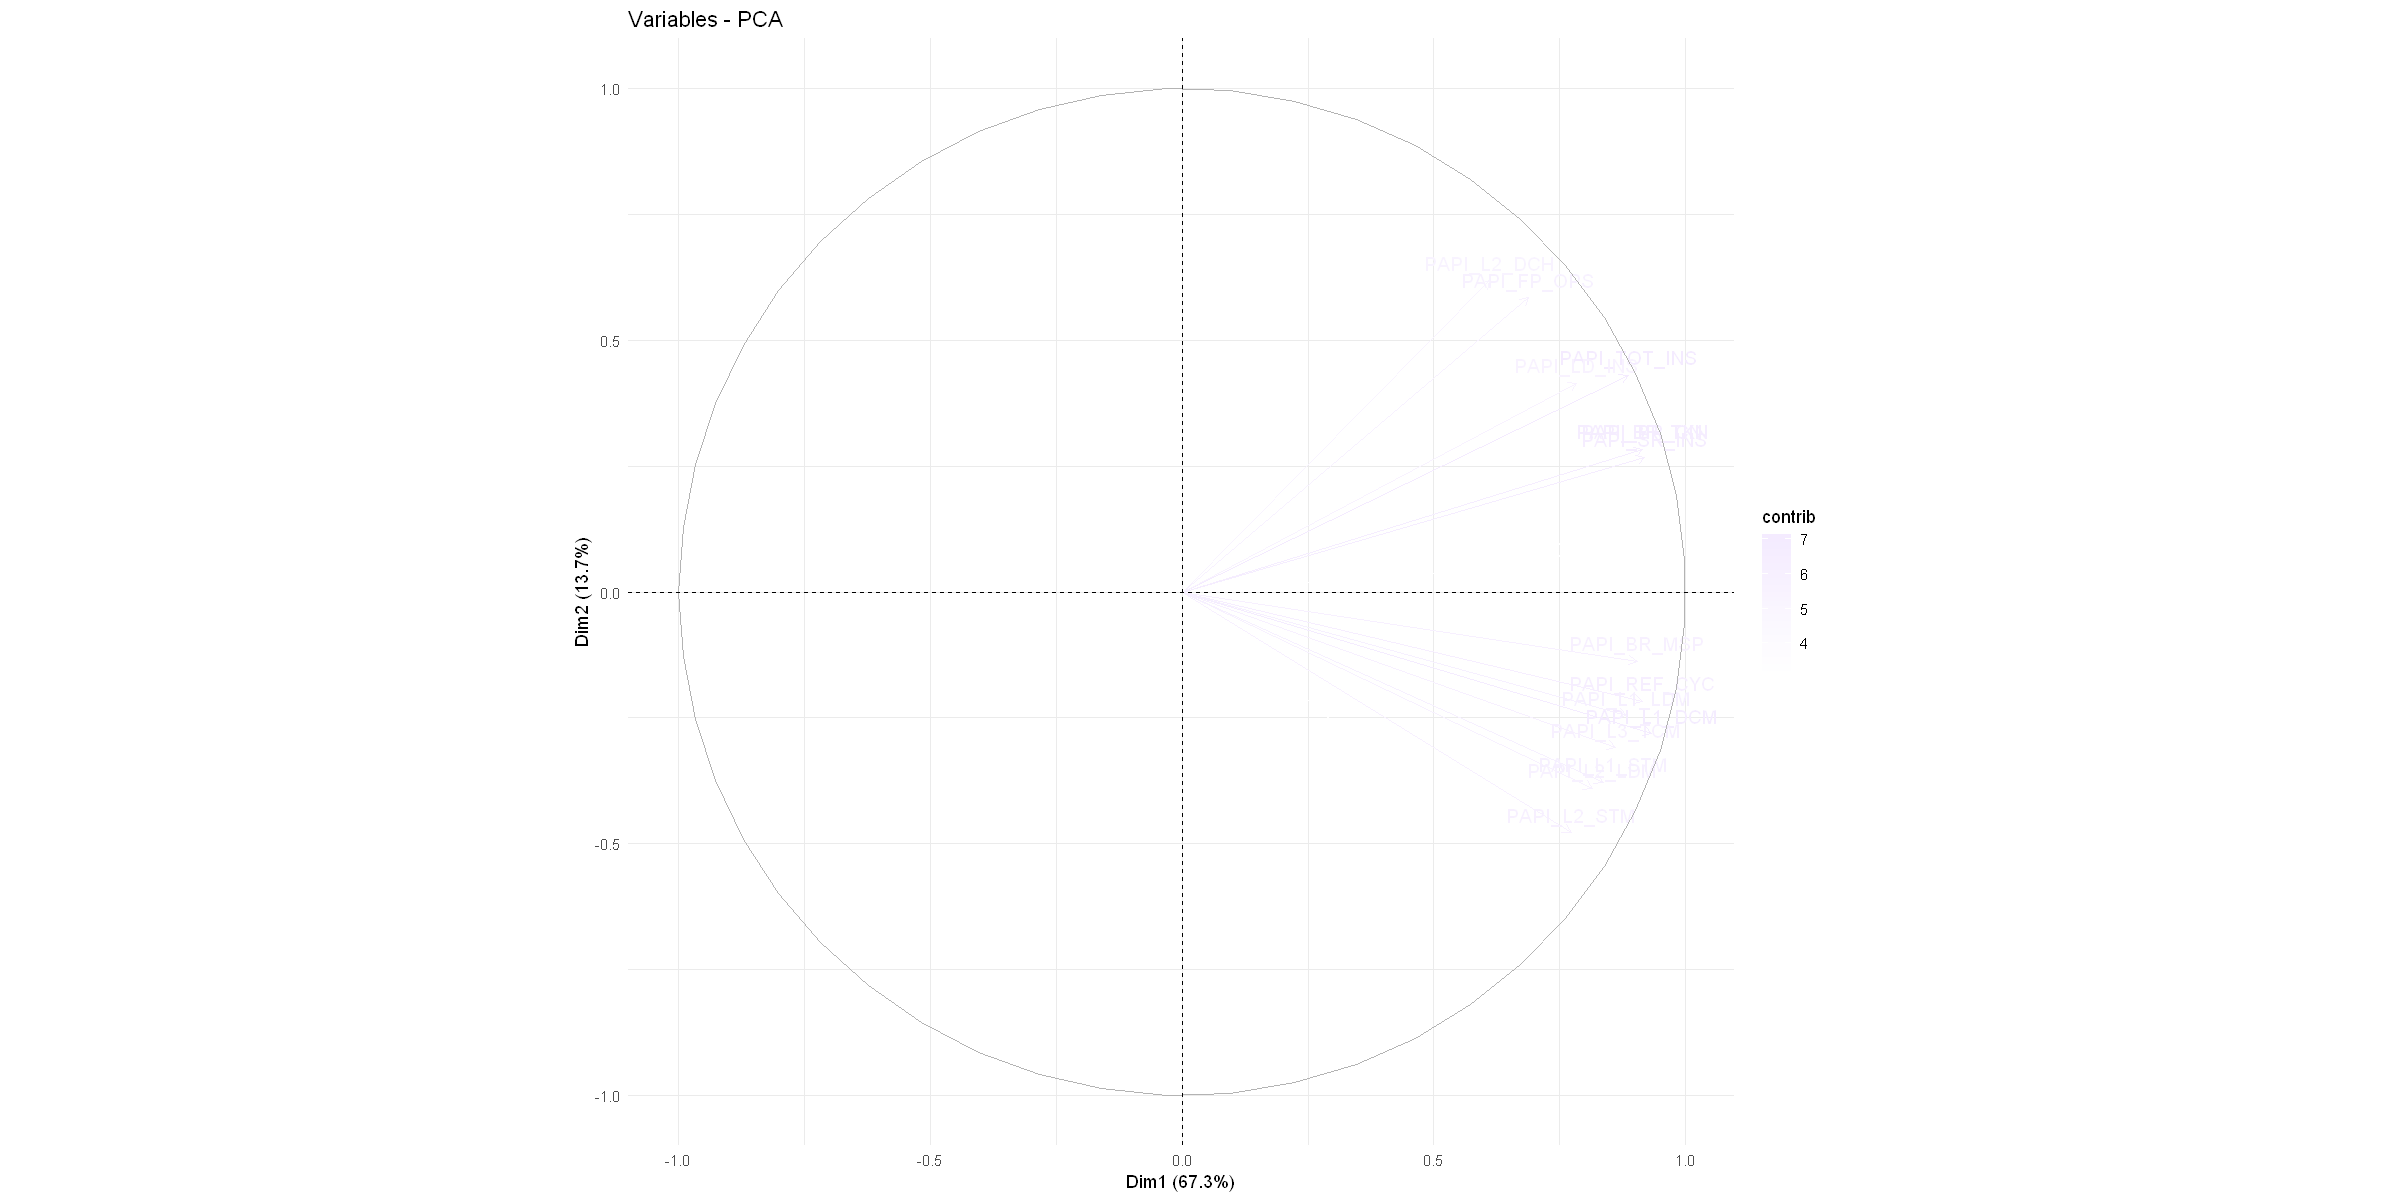

In [46]:
fviz_pca_var(res.pca, col.var="contrib") + scale_color_gradient2(low="white", mid="blue", high="red", midpoint=50) + theme_minimal()

In [47]:
new_mydata1 = mydata[,5:61]
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TOT_CYC))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TLB_DM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_FP_INS))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_INS))

new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_TCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TLB_IM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_RES_STL))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_PRC))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_MSP))




new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_DP))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_SP))

my_data_ordered1 <- new_mydata1[,order(colnames(new_mydata1))]


options(repr.matrix.max.rows = 100)
options(repr.matrix.max.cols = 100)
res1 <- cor(my_data_ordered1)
dim(res1)
round(res1, 2)

ERROR: Error in `[.data.frame`(mydata, , 5:61): undefined columns selected


In [ ]:
library(corrplot)


corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "AOE", number.cex = 0.5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=2)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=3)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=4)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=6)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=7)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=8)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=9)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=10)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=11)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=12)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=13)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=14)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=15)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=16)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=17)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "FPC", number.cex = 0.5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "alphabet", number.cex = 0.5)